In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize(x):
    return x / np.linalg.norm(x)

In [3]:
def disp(x):
    try:
        aspect = (img_plane_dim[0] / img_plane_dim[1]) * (img.shape[1] / img.shape[0])
    except:
        aspect = None
    plt.imshow(x, cmap='gray', vmin=0, vmax=1, aspect=aspect)    

In [4]:
# Create a 100x100 grayscale image: (height, width)
img = np.zeros((180, 200))

# just a little test
img[5, 10] = 1

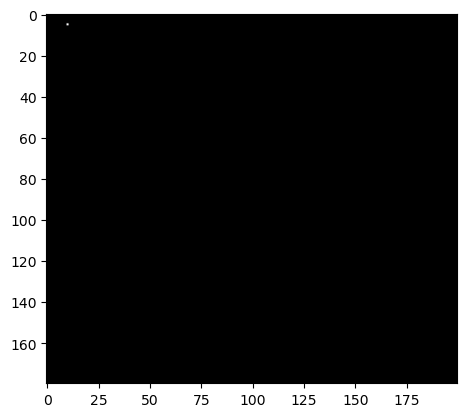

In [5]:
disp(img)

In [6]:
# location of the eye/camera
eye = np.array([1, 0, 0])

# dimensions of image plane: (vertical, horizontal)
img_plane_dim = np.array([1, 1])

# location of center of image plane
img_plane_center = eye + np.array([3, 0, 0])

# normal vector to image plane
img_plane_normal = normalize(np.array([1, 0, 0]))

# vertical vector in the image plane
img_plane_vertical = normalize(np.array([0, 0, 1]))

def pixel_phys_loc(i, j):
    """return the physical location of a
    pixel in space given the pixel indices
    i: vertical number of pixels from top left
    j: horizontal number of pixels from top left
    """
    
    # vector pointing to the right in the image
    img_plane_right = np.cross(img_plane_normal, img_plane_vertical)
    
    # vector pointing down in the image
    img_plane_down = -img_plane_vertical
    
    # TODO: vectorize more?
    pixel_loc = img_plane_center \
        + img_plane_down  * img_plane_dim[0] * (-1/2 + i/img.shape[0]) \
        + img_plane_right * img_plane_dim[1] * (-1/2 + j/img.shape[1])
    
    # TODO: Be more precise about where the center of each
    # pixel is (account for the width of each pixel properly)
    
    return pixel_loc

In [7]:
# TODO: Maybe define classes for different objects?
# Then each instance can store parameters for that object
# And each class can include an intersection test funcction

$a \cdot a = \lvert a \rvert^2$

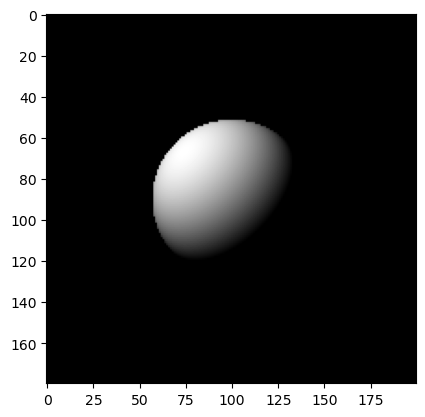

In [8]:
# for each pixel in the image
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        
        # Map a pixel in the image to a location on the image plane
        pixel_loc = pixel_phys_loc(i, j)
        
        # Calculate ray from eye to that point in the image plane
        ray = pixel_loc - eye
        
        #rayfunc = lambda t: eye + t*ray
        
        # TODO: Move intersection logic out of here into a Sphere class
        sphere_center = np.array([15, 0, 0])
        sphere_radius = 1
        
        # TODO: Move light location(s) out of here
        light_loc = np.array([10, 5, 5])
        
        # p: point on sphere (vec)
        # c: sphere center (vec)
        # R: sphere radius (scalar)
        # e: eye point (vec)
        # d: ray (vec)
        # t: ray paramter (scalar)
        # e+td: parameterized ray
        # (p - c) . (p - c) - R^2 = 0
        # (e + td - c) . (e + td - c) - R^2 = 0
        # USE linearity of dot product, factoring scalar components
        # (d . d) t^2 + 2d . (e - c) t + (e - c) . (e - c) - R^2 = 0
        
        quad_a = np.dot(ray, ray)
        quad_b = np.dot(2 * ray, eye - sphere_center)
        quad_c = (np.dot(eye - sphere_center, eye - sphere_center) - sphere_radius)
        
        # b^2 - 4ac
        under_sqrt = quad_b**2 - 4*quad_a*quad_c

        if under_sqrt > 0:
            
            discriminant = np.sqrt(under_sqrt)
            min_soln = np.min([
                (-quad_b + discriminant) / (2*quad_a),
                (-quad_b - discriminant) / (2*quad_a)
            ])
        
            intersect = eye + min_soln * ray
            
            #print(intersect)
                        
            sphere_normal = intersect - sphere_center
            to_light = light_loc - intersect
                        
            intensity = np.dot(
                normalize(sphere_normal),
                normalize(to_light)
            )
            
            # normal is greater than 90deg from light
            if intensity < 0:
                intensity = 0
                        
            #img[i, j] = 1
            img[i, j] = intensity
        
        # elif under_sqrt == 0:
        else:
            img[i, j] = 0
        
        # Determine nearest object the ray intersects
        # Determine the color of the location... maybe based on angle / occlusion wrt light source(s)

disp(img)